To classify images into these 10 superclasses and 100 classes, we'll utilize a convolutional neural network (CNN) architecture, one of the most commonly used architectures for image classification tasks. Here's a basic outline for the process:

# 1. Python Imports

In [34]:
# !conda install -c anaconda seaborn -y

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adam
from keras.utils import to_categorical
from tensorflow.math import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # For heatmap visualization
from sklearn.metrics import classification_report, accuracy_score

# 2. Data Preprocessing:
Loading Data: Use a suitable data loader to read images.
Data Augmentation: Apply data augmentation techniques like rotation, scaling, horizontal flip, etc., to increase the dataset's diversity.
Splitting the Data: Partition the dataset into training, validation, and test sets.

Each image is 32x32 pixels

In [36]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Display Images from CIFAR10 Dataset

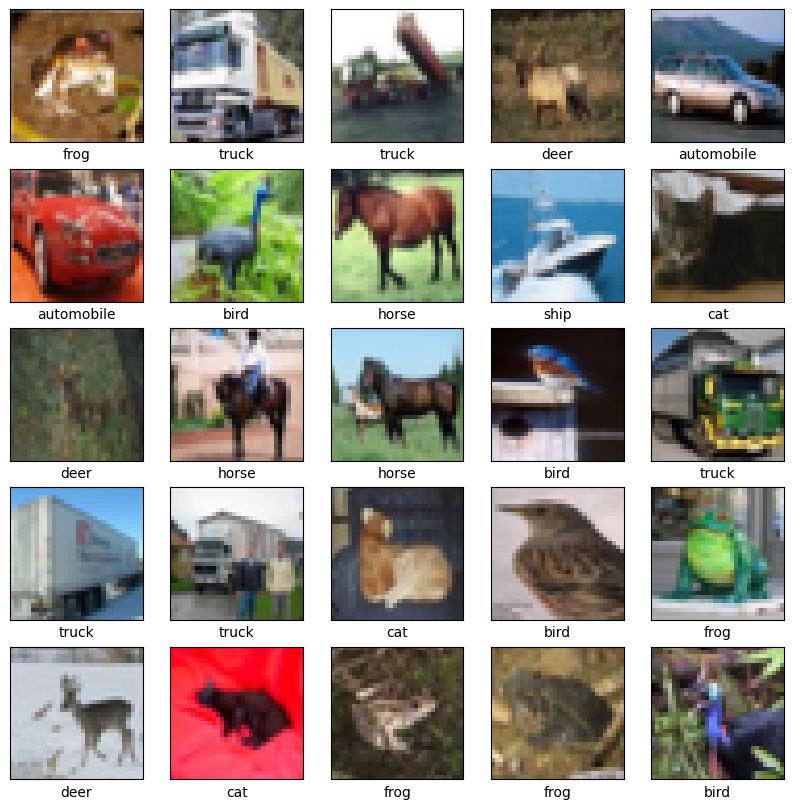

In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 3. Building the CNN Model:
Here's a basic CNN architecture to start with:

In [38]:
# ------------------------------
# Accuracy: ~75.8% @ 100 epochs
# ------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    # Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    # Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    # MaxPooling2D((2, 2)),
    Flatten(),
    # Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax'),
])

# ------------------------------
# Accuracy: ~71.5% @ 20 epochs
# ------------------------------
# model = Sequential([
#     Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)), # Assuming images are 32x32x3
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(10),
# ])

# ------------------------------
# Accuracy: ~71% @ 20 epochs
# ------------------------------
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)), # Assuming images are 32x32x3
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax'),
# ])


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [40]:
opt = SGD(learning_rate=0.001, momentum=0.9)
# opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.compile(optimizer='adam', loss='sparce_categorical_crossentropy', metrics=['accuracy'])

# 4. Training the Model:
Once you have the model ready, you can train it using the training data.

In [41]:
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

Epoch 1/100


c:\Users\rdash\anaconda3\envs\ci\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 19s 12ms/step - loss: 1.6517 - accuracy: 0.4048 - val_loss: 1.3522 - val_accuracy: 0.5168
Epoch 2/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2389 - accuracy: 0.5616 - val_loss: 1.1400 - val_accuracy: 0.5998
Epoch 3/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0463 - accuracy: 0.6332 - val_loss: 1.0504 - val_accuracy: 0.6304
Epoch 4/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9085 - accuracy: 0.6826 - val_loss: 0.9605 - val_accuracy: 0.6657
Epoch 5/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8076 - accuracy: 0.7198 - val_loss: 0.8966 - val_accuracy: 0.6869
Epoch 6/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7202 - accuracy: 0.7496 - val_loss: 0.8297 - val_accuracy: 0.7126
Epoch 7/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6480 - accuracy: 0.7749 - val_loss: 0.8751 - val_

# 5. Model Evaluation:
After training, evaluate the model's performance on the test dataset.

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.6804 - accuracy: 0.7590
Test accuracy:  0.7590000033378601


313/313 - 1s - loss: 2.6804 - accuracy: 0.7590 - 1s/epoch - 4ms/step


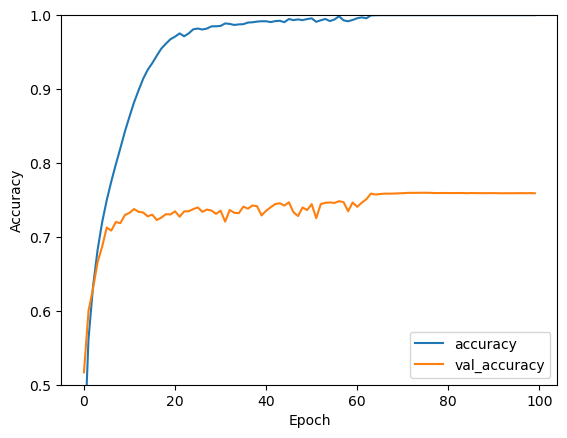

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 [==============================] - 1s 4ms/step


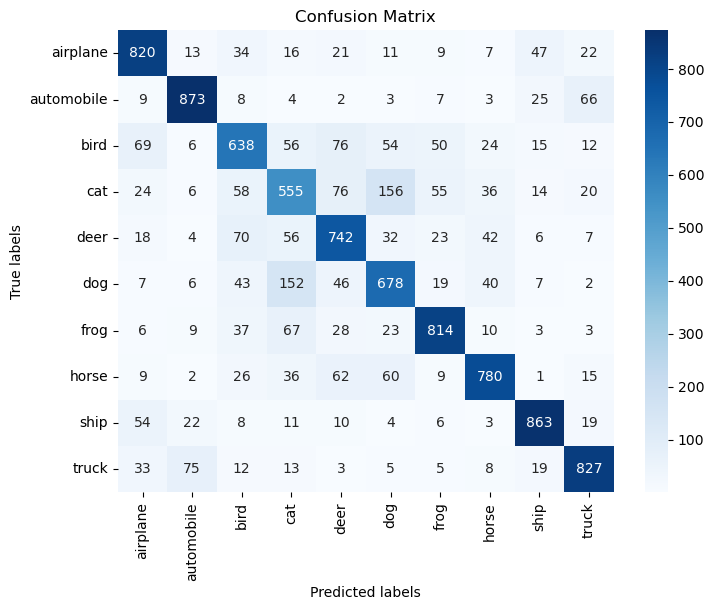

In [44]:
# Use model.predict() to obtain predicted labels
predicted_labels = np.argmax(model.predict(test_images), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
# conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(test_labels, axis=1)

313/313 [==============================] - 1s 4ms/step


In [46]:
# Calculate metrics
f1 = classification_report(y_test_classes, y_pred_classes, target_names=[
                            "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
total_loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Map class indices to class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


print(f"\nF1 Score:\n{f1}")
print(f"Total Loss: {total_loss}")
print(f"Accuracy: {accuracy}")


c:\Users\rdash\anaconda3\envs\ci\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rdash\anaconda3\envs\ci\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rdash\anaconda3\envs\ci\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



F1 Score:
              precision    recall  f1-score   support

    airplane       1.00      0.10      0.19     10000
  automobile       0.00      0.00      0.00         0
        bird       0.00      0.00      0.00         0
         cat       0.00      0.00      0.00         0
        deer       0.00      0.00      0.00         0
         dog       0.00      0.00      0.00         0
        frog       0.00      0.00      0.00         0
       horse       0.00      0.00      0.00         0
        ship       0.00      0.00      0.00         0
       truck       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.10      0.19     10000

Total Loss: 2.6804070472717285
Accuracy: 0.7590000033378601


# 6. Fine-tuning and Optimization:
Transfer Learning: If training from scratch doesn't give good results, consider using transfer learning. Pre-trained models like VGG16, ResNet, etc., can be utilized. These models are trained on large datasets and can help in achieving better accuracy.

Hyperparameter Tuning: We can use tools like Keras Tuner or techniques like random search and grid search to find the best hyperparameters for the model.

# 7. Deployment:
Once satisfied with the model's performance, you can deploy it for real-time predictions.

# 8. Notes:
Dataset Size: The architecture might need adjustments depending on the dataset's size. If the dataset is too small, consider using techniques like transfer learning.

Image Size: The example assumes images of size 32x32x3. If the actual size is different, adjust the input_shape accordingly.

Label Encoding: Make sure to one-hot encode the labels before training as the model uses 'categorical_crossentropy' as the loss function.